# Simulating Open Networks from SIS Epidemic Model 

One can change the parameters to evaluate different types of graphs and see different experiments.

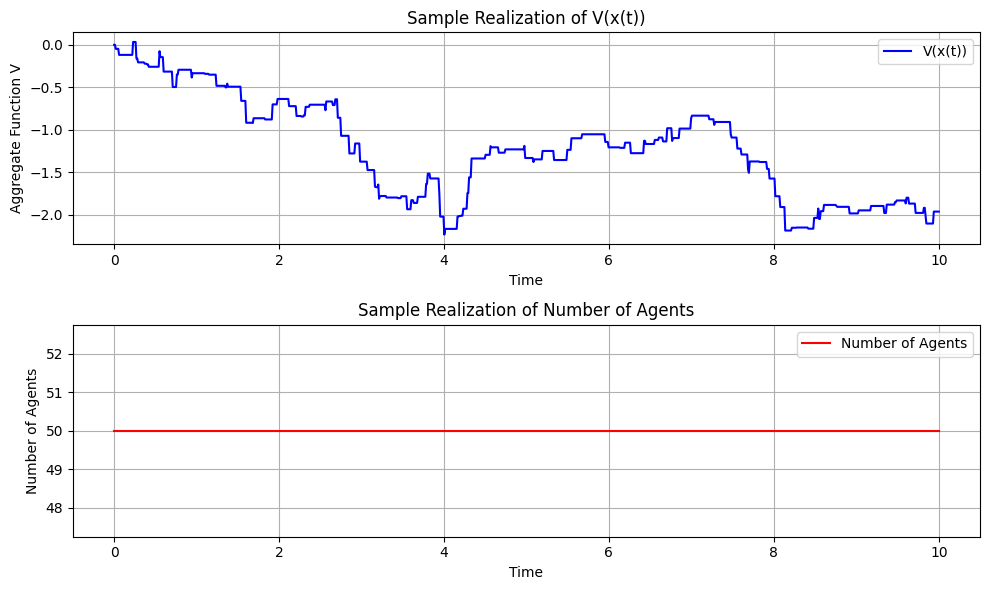

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n0 = 50  # Initial number of agents
p = 0.5  # Probability of edge generation
mu = 7  # Arrival and departure rate
beta_bar = 0.1  # Average infection rate
delta = 0.15 * p * beta_bar  # Recovery rate
m = 1/2  # Mean of infection probability
sigma_sq = 1/12  # Variance of infection probability
V_initial = 0  # Initial value of aggregate function V

# Time parameters
T = 10  # Total time
dt = 0.01  # Time step
num_steps = int(T / dt)  # Number of time steps

# Function to compute the rate of change of V
def f(V):
    return 0  # Placeholder

# Function to compute the change of V during an arrival
def ga(V):
    return np.random.normal(0, 0.1)  # Placeholder

# Function to compute the change of V during a departure
def gd(V):
    return -np.random.normal(0, 0.1)  # Placeholder

# Initialize arrays to store results
V_values = np.zeros(num_steps)
V_values[0] = V_initial

# Simulation loop
for i in range(1, num_steps):
    # Compute increments
    dN_a = np.random.poisson(mu * dt)
    dN_d = np.random.poisson(mu * dt)
    
    # Update V using Euler-Maruyama method
    V_values[i] = V_values[i-1] + f(V_values[i-1]) * dt + ga(V_values[i-1]) * dN_a + gd(V_values[i-1]) * dN_d

# Plot results
plt.figure(figsize=(10, 6))

# Plot aggregate function V
plt.subplot(2, 1, 1)
plt.plot(np.linspace(0, T, num_steps), V_values, label='V(x(t))', color='blue')
plt.xlabel('Time')
plt.ylabel('Aggregate Function V')
plt.title('Sample Realization of V(x(t))')
plt.grid(True)
plt.legend()

# Plot number of agents
plt.subplot(2, 1, 2)
plt.plot(np.linspace(0, T, num_steps), [n0]*num_steps, label='Number of Agents', color='red')
plt.xlabel('Time')
plt.ylabel('Number of Agents')
plt.title('Sample Realization of Number of Agents')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


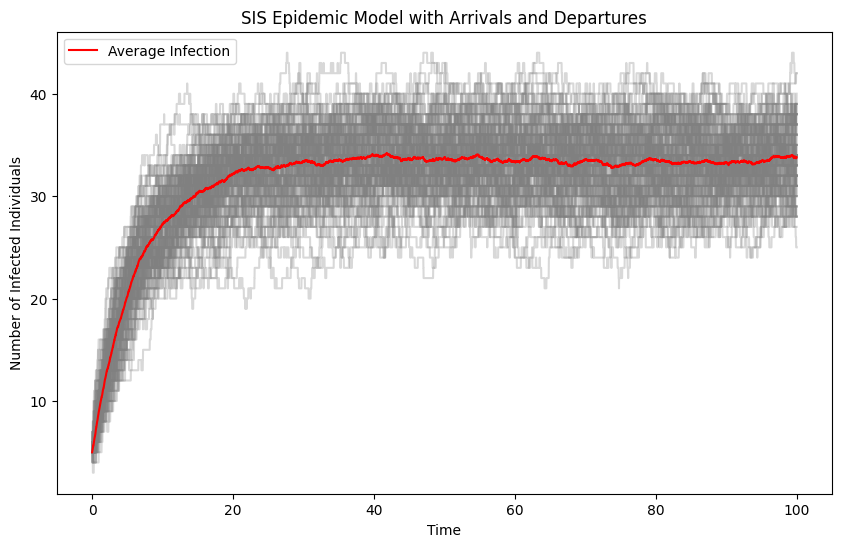

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta = 0.1  # Infection rate
delta = 0.05  # Recovery rate
mu_a = 0.02  # Arrival rate
mu_d = 0.01  # Departure rate
T = 100  # Total time
dt = 0.01  # Time step
N_simulations = 100  # Number of simulations

def simulate_sis(T, dt, beta, delta, mu_a, mu_d):
    # Initialize time and state variables
    t = np.arange(0, T + dt, dt)
    N = len(t)
    V = np.zeros(N)  # Infected individuals
    V[0] = 5  # Initial number of infected individuals
    total_population = 50  # Initial total population

    # Simulate the dynamics
    for i in range(1, N):
        recovery_events = np.random.binomial(V[i-1], delta*dt)
        if total_population - V[i-1] > 0:
            infection_events = np.random.binomial(total_population - V[i-1], beta*dt)
        else:
            infection_events = 0
        arrival_events = np.random.poisson(mu_a*dt)
        departure_events = np.random.poisson(mu_d*dt)
        
        # Update the state
        V[i] = np.maximum(0, V[i-1] + infection_events - recovery_events)
        # Handle population changes
        total_population = np.maximum(1, total_population + arrival_events - departure_events)
        V[i] = min(V[i], total_population)  # Infected cannot exceed the total population
        
    return t, V

# Simulation
results = []
for i in range(N_simulations):
    _, V = simulate_sis(T, dt, beta, delta, mu_a, mu_d)
    results.append(V)

# Compute the average across all simulations
average_infection = np.mean(results, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
for V in results:
    plt.plot(_, V, color='gray', alpha=0.3)  # Individual realizations
plt.plot(_, average_infection, color='red', label='Average Infection')  # Average
plt.xlabel('Time')
plt.ylabel('Number of Infected Individuals')
plt.legend()
plt.title('SIS Epidemic Model with Arrivals and Departures')
plt.show()


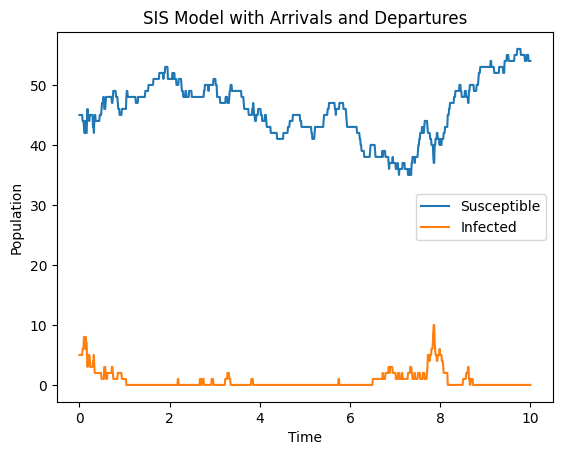

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Time steps
dt = 0.01  # Time step size
T = N * dt  # Total simulation time
mu_a = 0.1  # Arrival rate per time step
mu_d = 0.1  # Departure rate per time step
beta = 0.05  # Infection rate
gamma = 0.1  # Recovery rate
initial_infected = 5
initial_population = 50  # Including infected
infection_probability_at_arrival = 0.2  # Probability a new arrival is infected

# State variables
S = np.zeros(N)  # Susceptible count
I = np.zeros(N)  # Infected count
S[0] = initial_population - initial_infected
I[0] = initial_infected

def simulate():
    for t in range(1, N):
        # Calculate transitions
        infection_events = np.random.binomial(S[t-1], beta * I[t-1] / (S[t-1] + I[t-1]))
        recovery_events = np.random.binomial(I[t-1], gamma)

        # Update counts due to infection and recovery
        S[t] = S[t-1] - infection_events + recovery_events
        I[t] = I[t-1] + infection_events - recovery_events

        # Handle arrivals
        arrivals = np.random.poisson(mu_a)
        infected_arrivals = np.random.binomial(arrivals, infection_probability_at_arrival)
        S[t] += arrivals - infected_arrivals
        I[t] += infected_arrivals

        # Handle departures
        departures = min(np.random.poisson(mu_d), S[t] + I[t])  # Ensure we don't have negative population
        if departures > 0:
            departing_ratio_s = S[t] / (S[t] + I[t])
            departing_ratio_i = I[t] / (S[t] + I[t])
            S[t] -= np.random.binomial(departures, departing_ratio_s)
            I[t] -= np.random.binomial(departures, departing_ratio_i)

simulate()

# Plot the results
time_range = np.linspace(0, T, N)
plt.plot(time_range, S, label='Susceptible')
plt.plot(time_range, I, label='Infected')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('SIS Model with Arrivals and Departures')
plt.legend()
plt.show()

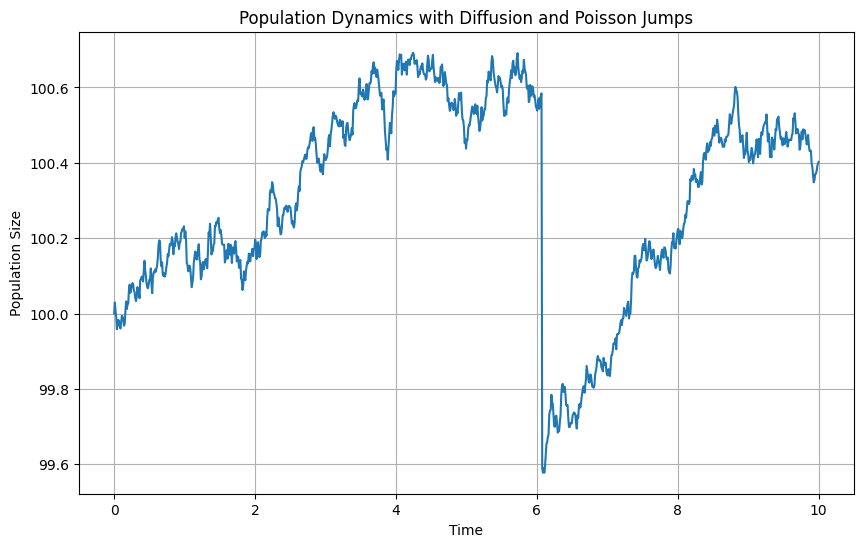

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 10.0  # total time
N = 1000  # number of steps
dt = T/N  # time step
mu_d = 0.05  # rate of departures (per unit time)
mu_a = 0.07  # rate of arrivals (per unit time)
beta = 0.2  # diffusion coefficient (variance of the process)
initial_population = 100  # initial number of individuals

# Initialize arrays to store the simulation results
time = np.linspace(0, T, N)
population = np.zeros(N)
population[0] = initial_population

# Random walk + Jump diffusion simulation
for i in range(1, N):
    # Euler-Maruyama for the continuous part (assuming a simple Brownian motion for illustration)
    diffusion = beta * np.sqrt(dt) * np.random.normal()
    
    # Simulate Poisson jumps for arrivals and departures
    arrivals = np.random.poisson(mu_a * dt)
    departures = np.random.poisson(mu_d * dt)
    
    # Update the population size
    population[i] = population[i-1] + diffusion + arrivals - departures

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, population)
plt.title('Population Dynamics with Diffusion and Poisson Jumps')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.grid(True)
plt.show()

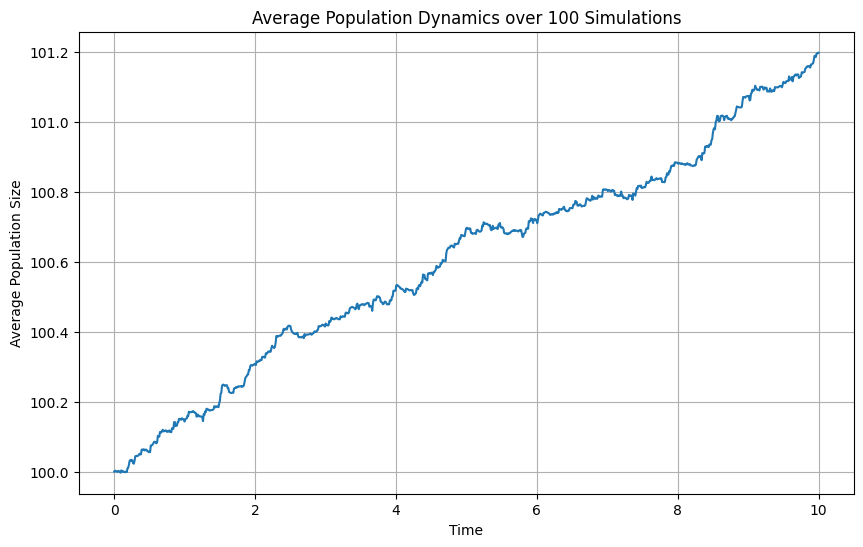

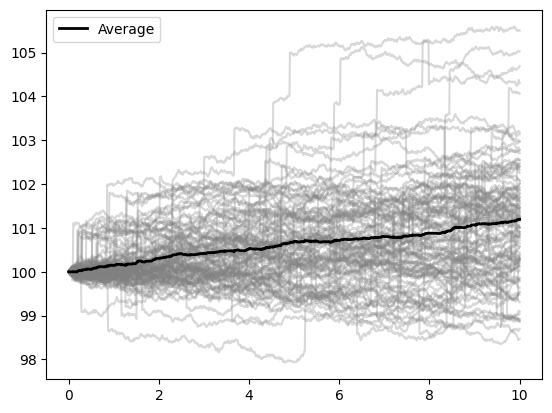

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 10.0  # total time
N = 1000  # number of steps
dt = T/N  # time step
mu_d = 0.05  # rate of departures (per unit time)
mu_a = 0.17  # rate of arrivals (per unit time)
beta = 0.2  # diffusion coefficient (variance of the process)
initial_population = 100  # initial number of individuals
num_simulations = 100  # Number of simulations

# Initialize array to store simulation results for each run
results = np.zeros((num_simulations, N))

for sim in range(num_simulations):
    population = np.zeros(N)
    population[0] = initial_population

    for i in range(1, N):
        # Euler-Maruyama for the continuous part
        diffusion = beta * np.sqrt(dt) * np.random.normal()
        
        # Simulate Poisson jumps for arrivals and departures
        arrivals = np.random.poisson(mu_a * dt)
        departures = np.random.poisson(mu_d * dt)
        
        # Update the population size
        population[i] = population[i-1] + diffusion + arrivals - departures

    results[sim, :] = population

# Calculate the average population size at each time step
average_population = np.mean(results, axis=0)

# Plot the average results
plt.figure(figsize=(10, 6))
plt.plot(time, average_population)
plt.title('Average Population Dynamics over 100 Simulations')
plt.xlabel('Time')
plt.ylabel('Average Population Size')
plt.grid(True)
plt.show()

# Optional: Plotting all simulations with the average overlaid
for sim in range(num_simulations):
    plt.plot(time, results[sim, :], color='gray', alpha=0.3)  # Individual simulations in light gray

plt.plot(time, average_population, color='black', linewidth=2, label='Average')  # Average in bold black
plt.legend()
plt.show()

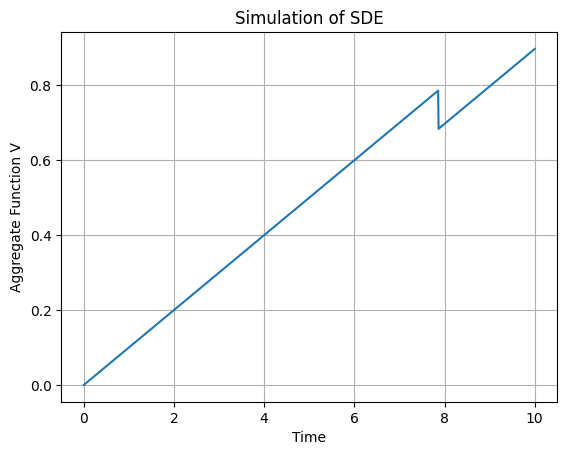

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu_a = 0.1  # Arrival rate
mu_d = 0.05  # Departure rate
m = 0.5  # Mean of infection probability
sigma_sq = 0.1  # Variance of infection probability
p = 0.2  # Probability of edge generation
delta = 0.1  # Recovery rate
beta_bar = 0.2  # Average infection rate
V_initial = 0  # Initial value of aggregate function V

# Time parameters
T = 10  # Total time
dt = 0.01  # Time step
num_steps = int(T / dt)  # Number of time steps

# Function to compute the rate of change of V
def f(V):
    # Placeholder example: linear growth
    return 0.1

# Function to compute the change of V during an arrival
def ga(V):
    # Placeholder example: Poisson increment
    return np.random.normal(0, 0.1)

# Function to compute the change of V during a departure
def gd(V):
    # Placeholder example: Poisson decrement
    return -np.random.normal(0, 0.1)

# Initialize arrays to store results
V_values = np.zeros(num_steps)
V_values[0] = V_initial

# Simulation loop
for i in range(1, num_steps):
    # Compute increments
    dN_a = np.random.poisson(mu_a * dt)
    dN_d = np.random.poisson(mu_d * dt)
    
    # Update V using Euler-Maruyama method
    V_values[i] = V_values[i-1] + f(V_values[i-1]) * dt + ga(V_values[i-1]) * dN_a + gd(V_values[i-1]) * dN_d

# Plot results
plt.plot(np.linspace(0, T, num_steps), V_values)
plt.xlabel('Time')
plt.ylabel('Aggregate Function V')
plt.title('Simulation of SDE')
plt.grid(True)
plt.show()
